# Random Forest Regressor (RFR)

In [1]:
# Importing the libraries

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load

In [2]:
# Model

rfr_model = load('rfr_model_optimized.joblib')

In [3]:
TEST_SIZE = 0.1
RANDOM_SEED = 24

In [4]:
df = pd.read_csv('material_data.csv')

FEATURES = [
    'nuclear_charge', 'covalent_radius', 'electronegativity', 'electron_affinity',
    'nuclear_charge_max', 'nuclear_charge_min', 'covalent_radius_max', 'covalent_radius_min',
    'electronegativity_max', 'electronegativity_min', 'electron_affinity_max', 'electron_affinity_min',
    'ionization_energy', 'ionization_energy_max', 'ionization_energy_min',
    'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'E+', 'E-', 'E*', 'E÷',
    'EA+', 'EA-', 'EA*', 'EA÷', 'I+', 'I-', 'I*', 'I÷'
]

TARGET = ['ef']

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [5]:
pred = rfr_model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Root Mean Squared Error (RMSE): 0.2809
R²: 0.9230
Mean Absolute Error (MAE): 0.1628


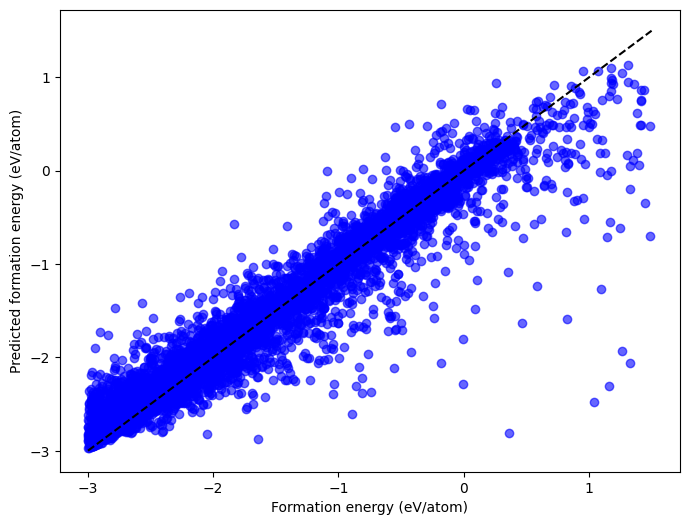

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()

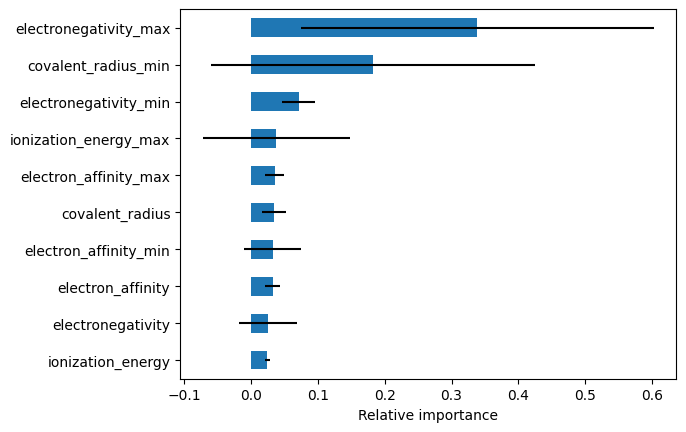

In [7]:
importance = rfr_model.feature_importances_
standard_deviation = np.std(
    [tree.feature_importances_ for tree in rfr_model.estimators_], axis=0
)

serie_importance = pd.Series(importance, index=FEATURES)
serie_standard_deviation = pd.Series(standard_deviation, index=FEATURES)

serie_importance_10 = serie_importance.nlargest(10)
standard_deviation_10 = serie_standard_deviation[serie_importance_10.index]

serie_importance_10 = serie_importance_10.iloc[::-1]
standard_deviation_10 = standard_deviation_10.iloc[::-1]

fig, axe = plt.subplots()
serie_importance_10.plot.barh(xerr=standard_deviation_10, ax=axe)
axe.set_xlabel("Relative importance")
plt.show()